In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
# Load housing.csv and display the data head
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

#See all the different value in ocean proximity
df.ocean_proximity.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df['households'].isnull().values.any()

df['total_bedrooms'].isnull().values.any()

True

In [ ]:
# Select the numerical featrues
df_num = df.select_dtypes(include = 'number')
df_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [ ]:

#NEAR BAY = 0, <H OCEAN = 1, INLAND =2, NEAR OCEAN =3, ISLAND = 4 
df['ocean_proximity'].mask(df['ocean_proximity'] == 'INLAND', 0, inplace=True)
df['ocean_proximity'].mask(df['ocean_proximity'] == '<1H OCEAN', 1, inplace=True)
df['ocean_proximity'].mask(df['ocean_proximity'] == 'NEAR BAY', 2, inplace=True)
df['ocean_proximity'].mask(df['ocean_proximity'] == 'NEAR OCEAN', 3, inplace=True)
df['ocean_proximity'].mask(df['ocean_proximity'] == 'ISLAND', 4, inplace=True)


df["ocean_proximity"] = pd.to_numeric(df["ocean_proximity"])

In [ ]:
#Check to see if ocean_proximity has been changed 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


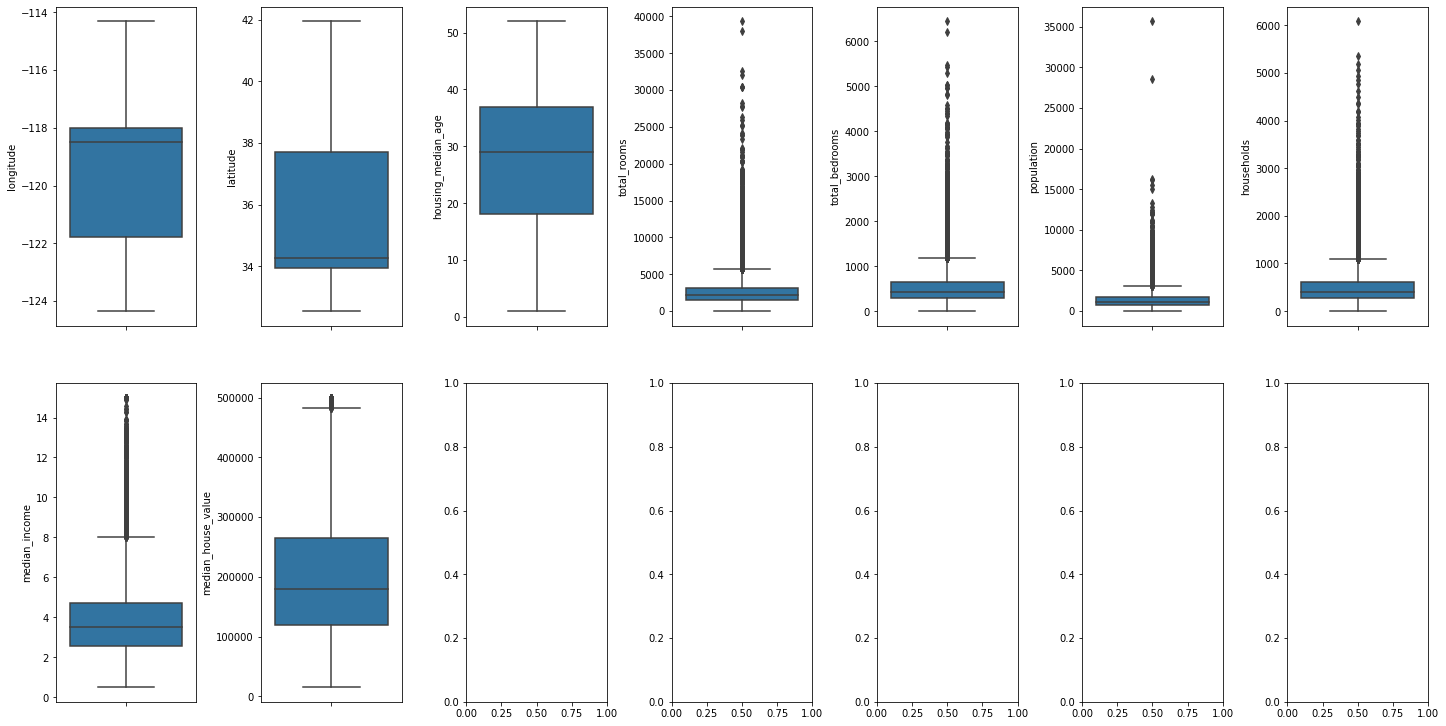

In [ ]:
# Data Pre-processing
# Check outliers in each column
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_num.items():
    sns.boxplot(y=k, data=df_num, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Let's look at the outlier percentages of each column.
for k, v in df_num.items():
      q1 = v.quantile(0.25)
      q3 = v.quantile(0.75)
      irq = q3 - q1
      v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
      perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
      print("Column %s outliers = %.2f%%" % (k, perc))

Column longitude outliers = 0.00%
Column latitude outliers = 0.00%
Column housing_median_age outliers = 0.00%
Column total_rooms outliers = 6.24%
Column total_bedrooms outliers = 6.16%
Column population outliers = 5.80%
Column households outliers = 5.91%
Column median_income outliers = 3.30%
Column median_house_value outliers = 5.19%


In [ ]:
import warnings
warnings.filterwarnings('ignore')

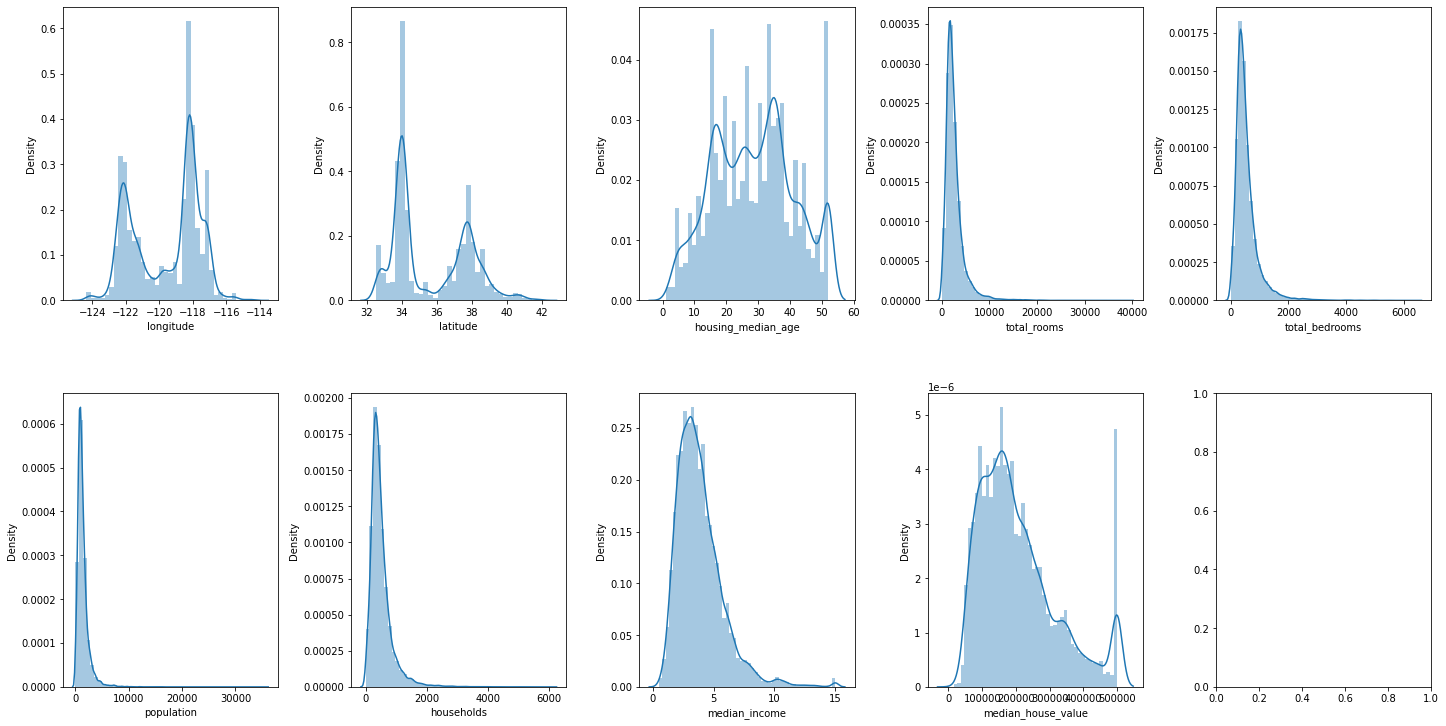

In [ ]:
# Plot distribution of each column
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_num.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Remove skewness of the data through log transformation 
for col in df.columns:
    if np.abs(df[col].skew()) > 0.3:
        df[col] = np.log1p(df[col])

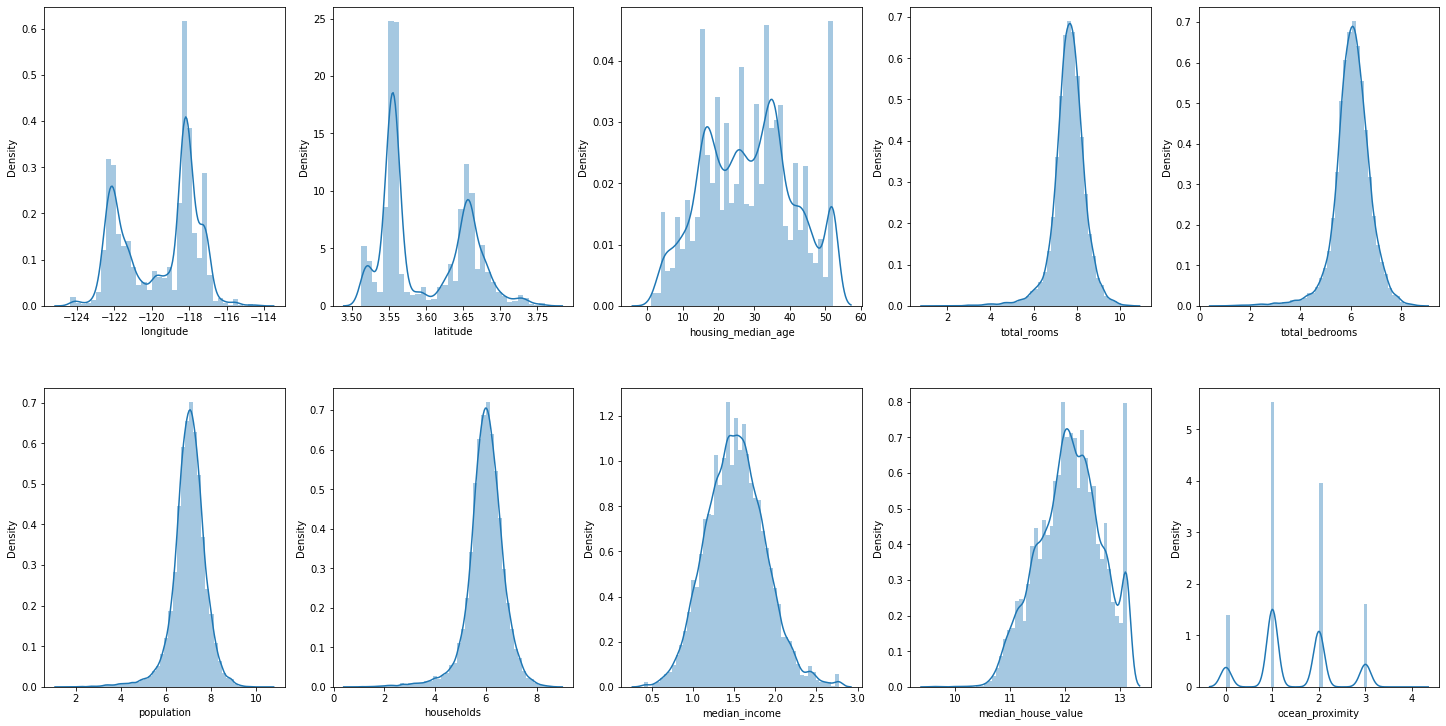

In [ ]:
# Distribution AFTER removing skewness
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

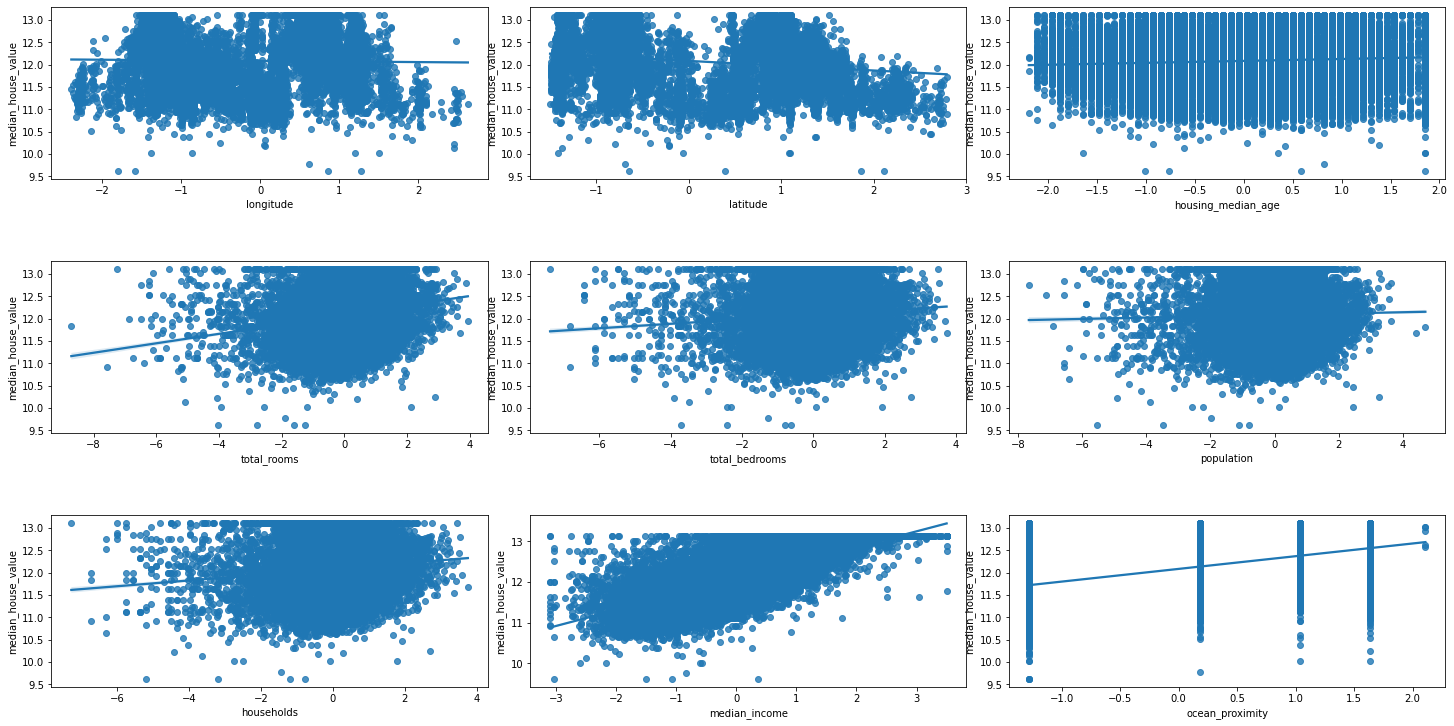

In [ ]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
std_scaler = preprocessing.StandardScaler()
column_sels = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity']
x = df.loc[:,column_sels]
y = df['median_house_value']
x = pd.DataFrame(data=std_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

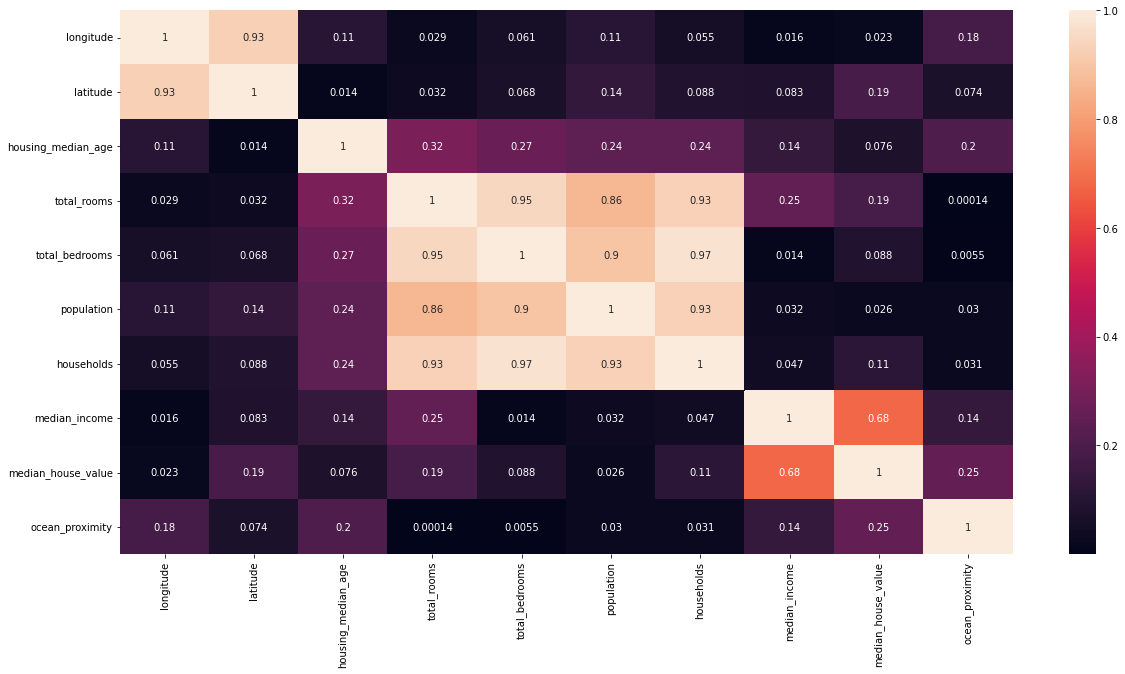

In [ ]:
# Correlation Analysis
# Create heatmap to see which features are correlated

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [ ]:
# keep total income, ocean proximity, latitude, and total rooms


x = df[['total_rooms', 'median_income','ocean_proximity']]

y = df['median_house_value']


In [ ]:
# Define x and y

# Normalize using standardscaler
standard_scaler = preprocessing.StandardScaler()
x_scaled = standard_scaler.fit_transform(x)

In [ ]:
# Split into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2)

In [ ]:
# 1. Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
l_regression = LinearRegression()
l_regression.fit(x_train, y_train)
y_pred = l_regression.predict(x_test)
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('r2_score : ', r2_score(y_test, y_pred))

mean_squared_error :  0.1725524732674013
r2_score :  0.4780276129893901


In [ ]:
# Coefficients:  'total_rooms', 'median_income','ocean_proximity'
l_regression.coef_

array([ 0.00921532,  0.37488788, -0.0893027 ])

In [ ]:
#median income -> strongest correlation 
#total room second 
#ocean proximity third 

Text(0.5, 1.0, 'Actual vs, Predicted')

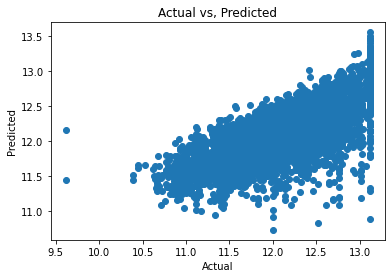

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs, Predicted')

In [ ]:
# 2. Knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
# Optimize the value k using gridsearchcv
knn = KNeighborsRegressor()
grid_sv = GridSearchCV(knn, cv=10, param_grid={"n_neighbors" : list(range(1,40))}, scoring='neg_mean_squared_error')
grid_sv.fit(x_train, y_train)
print("Best value for k :", grid_sv.best_estimator_)


Best value for k : KNeighborsRegressor(n_neighbors=39)


In [ ]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('r2_score : ', r2_score(y_test, y_pred))

mean_squared_error :  0.11916008316085862
r2_score :  0.6395399505664073


In [ ]:
error_rate = []
for i in range(1,150):
 knn = KNeighborsRegressor(n_neighbors=i)
 knn.fit(x_train,y_train)
 y_pred = knn.predict(x_test)
 error_rate.append(mean_squared_error(y_test, y_pred))



Minimum error:- 0.11457503251446982 at K = 74


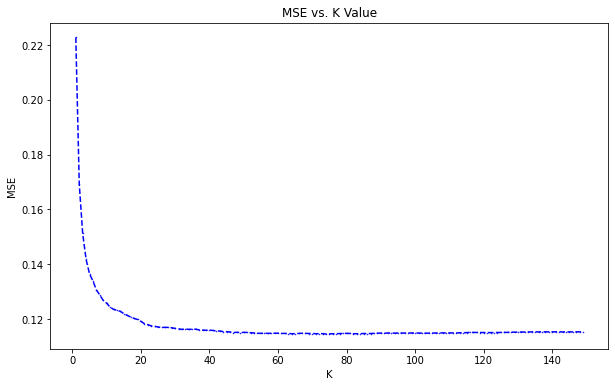

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,150),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=0.5)
plt.title('MSE vs. K Value')
plt.xlabel('K')
plt.ylabel('MSE')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [ ]:
# 3. Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10, oob_score=True)
# Tune the hyperparameters like n_estimator
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('r2_score : ', r2_score(y_test, y_pred))

mean_squared_error :  0.14472910085404175
r2_score :  0.5621935008395189


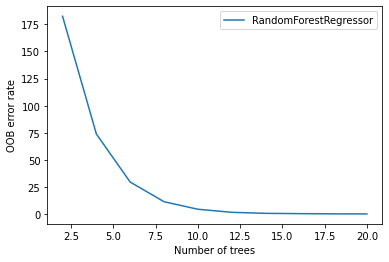

In [ ]:
from collections import OrderedDict
ensemble_clfs = [
    (
        "RandomForestRegressor",
        RandomForestRegressor(
            warm_start=True,
            oob_score=True,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 2
max_estimators = 20

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators+1 , 2):
        #print(i)
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        #print(oob_error)
        error_rate[label].append((i, oob_error))
        

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

#plt.xlim(0, 22)
#plt.xticks(np.arange(2,22,2), np.arange(2,22,2))
plt.xlabel("Number of trees")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()


In [ ]:

3#'total_rooms', 'median_income','ocean_proximity'
rfr.feature_importances_


array([0.18348928, 0.61741243, 0.19909829])

In [ ]:
# 4. Neural Network 
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
regr = MLPRegressor().fit(x_train, y_train)
y_pred = regr.predict(x_test)
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('r2_score : ', r2_score(y_test, y_pred))

mean_squared_error :  0.11544237747412349
r2_score :  0.6479321182114925


In [ ]:
regr.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
clf = GridSearchCV(regr, parameter_space, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')
clf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='neg_mean_squared_error')

In [ ]:

clf.best_estimator_

MLPRegressor(hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive',
             solver='sgd')

In [ ]:
regr = MLPRegressor(hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive',
             solver='sgd').fit(x_train, y_train)
y_pred = regr.predict(x_test)
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('r2_score : ', r2_score(y_test, y_pred))

mean_squared_error :  0.1146512984014466
r2_score :  0.65034469442084


[7.930952886741242, 0.08789533693479144, 0.06739895082077631, 0.06386904434718241, 0.0623439734130692, 0.06139228851868546, 0.0605684013470382, 0.060102960081460544, 0.05961786250904321, 0.059197029938127636, 0.05891671748417736, 0.058602021824968854, 0.05842024696433597, 0.058229264481647516, 0.05803373434840308, 0.05786961242027572, 0.05774981095222661, 0.057612757960984015, 0.05744729723055438, 0.05741938042294878, 0.057231316562332435, 0.057257811755767635, 0.05718480697152785, 0.05699990611254398, 0.05694485397468839, 0.05687957405619576, 0.056881547440559975, 0.05685740648507536, 0.05679313411934129, 0.05671151045166918, 0.056743247532842746, 0.056636900143536485, 0.05661539077655167, 0.05652888352157068, 0.0565294847871755, 0.05641560891659511, 0.056360404828219135, 0.05634489167299715, 0.0563417588159959, 0.056350525089551295, 0.05634305112344137, 0.05633479849818661, 0.056333975312452614, 0.056316744537545226, 0.05633346743927943, 0.056291207367768235, 0.05632755055722656, 0.0

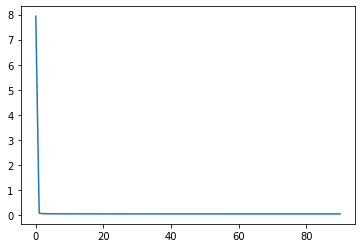

In [ ]:
# Compare training vs test error
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print(regr.loss_curve_)
plt.plot(regr.loss_curve_) # loss

In [ ]:
# Check scores for test and training data
print(regr.score(x_train, y_train))
print(regr.score(x_test, y_test))

0.6519354744331851
0.6508960621571176
